list24 #6
the code is in arch_grach

In [1]:
!pip install arch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 22.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

from arch import arch_model

from arch.univariate import ARX, GARCH, ARCHInMean

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)


In [3]:
tb3= web.DataReader(name='TB3MS',data_source='fred',start='1995-01-01',end='2023-12-31')
y=tb3

<Axes: xlabel='DATE'>

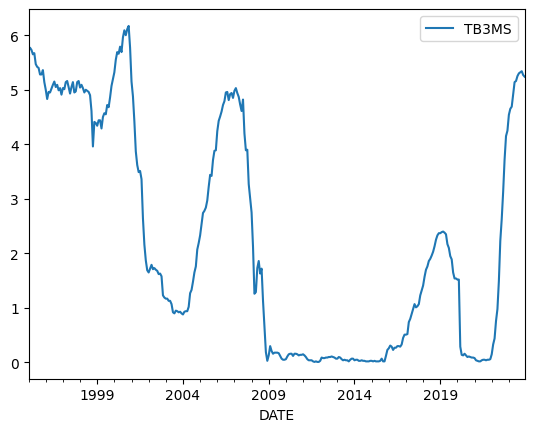

In [4]:
y.plot()

In [7]:
dy=y.diff().dropna()

Let us estimate the model $AR(1)+Garch(1,1)$
for Δ y_t$

In [9]:
am=arch_model(dy,mean='ARX',lags=1,vol='GARCH',p=1,q=1,power=2)
res=am.fit()
res.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 56280.788477877686
Iteration:      2,   Func. Count:     18,   Neg. LLF: 428.29459404034685
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1325.7176123772788
Iteration:      4,   Func. Count:     36,   Neg. LLF: -125.2821167475622
Iteration:      5,   Func. Count:     44,   Neg. LLF: -183.23914404474786
Iteration:      6,   Func. Count:     50,   Neg. LLF: -183.50284444896656
Iteration:      7,   Func. Count:     56,   Neg. LLF: -183.7253704962128
Iteration:      8,   Func. Count:     62,   Neg. LLF: -183.7933071803161
Iteration:      9,   Func. Count:     68,   Neg. LLF: -183.80039425409595
Iteration:     10,   Func. Count:     74,   Neg. LLF: -183.80064494616806
Iteration:     11,   Func. Count:     80,   Neg. LLF: -183.80063717395245
Iteration:     12,   Func. Count:     96,   Neg. LLF: 188.74697046962336
Iteration:     13,   Func. Count:    107,   Neg. LLF: -119.97768476786511
Iteration:     14,   Func. Count:    117,   N

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                  TB3MS   R-squared:                       0.217
Mean Model:                        AR   Adj. R-squared:                  0.215
Vol Model:                      GARCH   Log-Likelihood:                183.800
Distribution:                  Normal   AIC:                          -357.601
Method:            Maximum Likelihood   BIC:                          -338.369
                                        No. Observations:                  346
Date:                Fri, Dec 13 2024   Df Residuals:                      344
Time:                        16:25:30   Df Model:                            2
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.0133  1.814e-02      0.733      0.464 [-2.226e-02,4.886e-02]
TB3MS[1]       0.4040      0.305      1.325      0.185      [ -0.194,  1.002]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.5172e-03  7.922e-04      1.915  5.547e-02 [-3.550e-05,3.070e-03]
alpha[1]       0.2786  4.832e-02      5.767  8.067e-09      [  0.184,  0.373]
beta[1]        0.7214  8.016e-02      8.999  2.270e-19      [  0.564,  0.878]
=============================================================================

Covariance estimator: robust
"""

In [10]:
res.arch_lm_test(lags=5)

ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 10.0999
P-value: 0.0725
Distributed: <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79edf181ae90>
WaldTestStatistic, id: 0x79edf1818460

In [12]:
am1=arch_model(dy,mean='ARX',lags=1,vol='GARCH',p=1,q=1,power=1)
res=am1.fit()
res.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 19771.1196456429
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1760.673369257087
Iteration:      3,   Func. Count:     28,   Neg. LLF: 867.6228858632156
Iteration:      4,   Func. Count:     37,   Neg. LLF: -79.2555794161851
Iteration:      5,   Func. Count:     44,   Neg. LLF: -110.4147990279844
Iteration:      6,   Func. Count:     51,   Neg. LLF: -36.98565843974514
Iteration:      7,   Func. Count:     58,   Neg. LLF: 64627.16087493395
Iteration:      8,   Func. Count:     65,   Neg. LLF: 13.150093356998894
Iteration:      9,   Func. Count:     72,   Neg. LLF: 65210172.357655704
Iteration:     10,   Func. Count:     79,   Neg. LLF: -169.59249732915072
Iteration:     11,   Func. Count:     86,   Neg. LLF: -187.10129441228412
Iteration:     12,   Func. Count:     92,   Neg. LLF: -121.26560368890284
Iteration:     13,   Func. Count:     99,   Neg. LLF: -189.40801097984235
Iteration:     14,   Func. Count:    106,   Neg. LLF:

<class 'statsmodels.iolib.summary.Summary'>
"""
                          AR - AVGARCH Model Results                          
==============================================================================
Dep. Variable:                  TB3MS   R-squared:                       0.187
Mean Model:                        AR   Adj. R-squared:                  0.185
Vol Model:                    AVGARCH   Log-Likelihood:                195.593
Distribution:                  Normal   AIC:                          -381.186
Method:            Maximum Likelihood   BIC:                          -361.954
                                        No. Observations:                  346
Date:                Fri, Dec 13 2024   Df Residuals:                      344
Time:                        16:30:19   Df Model:                            2
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const      -1.9112e-03  1.387e-02     -0.138      0.890 [-2.910e-02,2.528e-02]
TB3MS[1]        0.6826      0.140      4.863  1.156e-06      [  0.407,  0.958]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.0146      0.158  9.239e-02      0.926 [ -0.295,  0.324]
alpha[1]       0.2694      0.417      0.645      0.519 [ -0.549,  1.088]
beta[1]        0.7306      0.972      0.751      0.452 [ -1.175,  2.636]
========================================================================

Covariance estimator: robust
"""

In [13]:
am2=arch_model(dy,mean='ARX',lags=2,vol='GARCH',p=1,q=1,power=2)
res=am2.fit()
res.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 28724.234645325658
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1155.4139535355803
Iteration:      3,   Func. Count:     31,   Neg. LLF: 24058127606.713154
Iteration:      4,   Func. Count:     40,   Neg. LLF: 3723.412178735077
Iteration:      5,   Func. Count:     51,   Neg. LLF: -88.85202641968404
Iteration:      6,   Func. Count:     59,   Neg. LLF: -185.77441613215717
Iteration:      7,   Func. Count:     66,   Neg. LLF: -154.22683995878168
Iteration:      8,   Func. Count:     75,   Neg. LLF: -185.91795581299166
Iteration:      9,   Func. Count:     82,   Neg. LLF: -186.2056437513924
Iteration:     10,   Func. Count:     89,   Neg. LLF: -186.27159716208547
Iteration:     11,   Func. Count:     96,   Neg. LLF: -186.29330975091725
Iteration:     12,   Func. Count:    103,   Neg. LLF: -186.29848681351936
Iteration:     13,   Func. Count:    110,   Neg. LLF: -186.29852727569704
Iteration:     14,   Func. Count:    116,   N

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                  TB3MS   R-squared:                       0.181
Mean Model:                        AR   Adj. R-squared:                  0.176
Vol Model:                      GARCH   Log-Likelihood:                186.299
Distribution:                  Normal   AIC:                          -360.597
Method:            Maximum Likelihood   BIC:                          -337.536
                                        No. Observations:                  345
Date:                Fri, Dec 13 2024   Df Residuals:                      342
Time:                        16:32:35   Df Model:                            3
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const      -7.9803e-03  2.153e-02     -0.371      0.711 [-5.017e-02,3.421e-02]
TB3MS[1]        0.4498  9.786e-02      4.597  4.290e-06      [  0.258,  0.642]
TB3MS[2]        0.3535      0.307      1.150      0.250      [ -0.249,  0.956]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.2197e-03  1.486e-03      1.493      0.135 [-6.935e-04,5.133e-03]
alpha[1]       0.3638      0.155      2.355  1.854e-02    [6.098e-02,  0.667]
beta[1]        0.6362  8.211e-02      7.748  9.304e-15      [  0.475,  0.797]
=============================================================================

Covariance estimator: robust
"""

The better model has lower AIC, which is the model $AR(2)+GRACH(1,1,1)$

Let us estimate the $GARCH$ model using sktime

In [18]:
!pip install sktime

In [15]:
import numpy as np
import pandas as pd

from sktime.forecasting.arch import ARCH
from sktime.utils.plotting import plot_series
# временной горизонт для прогнозирования
from sktime.forecasting.base import ForecastingHorizon

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [16]:
forecaster=ARCH(mean='AR',lags=2,vol='GARCH',p=1,q=1,power=1)
forecaster.fit(dy)
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          AR - AVGARCH Model Results                          
==============================================================================
Dep. Variable:                   None   R-squared:                       0.180
Mean Model:                        AR   Adj. R-squared:                  0.175
Vol Model:                    AVGARCH   Log-Likelihood:                198.698
Distribution:                  Normal   AIC:                          -385.395
Method:            Maximum Likelihood   BIC:                          -362.334
                                        No. Observations:                  345
Date:                Fri, Dec 13 2024   Df Residuals:                      342
Time:                        16:44:01   Df Model:                            3
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const         -0.0100  7.376e-03     -1.361      0.173 [-2.450e-02,4.416e-03]
None[1]        0.5035  6.463e-02      7.791  6.638e-15      [  0.377,  0.630]
None[2]        0.3174  3.774e-02      8.409  4.129e-17      [  0.243,  0.391]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.0163      0.105      0.155      0.877 [ -0.190,  0.223]
alpha[1]       0.3056      0.253      1.210      0.226 [ -0.190,  0.801]
beta[1]        0.6944      0.621      1.118      0.264 [ -0.523,  1.912]
========================================================================

Covariance estimator: robust
"""

In [21]:
from sktime.utils.plotting import plot_series
from sktime.split import temporal_train_test_split,ExpandingSlidingWindowSplitter,SlidingWindowSplitter
from sktime.forecasting.model_evaluation import evaluate
from sktime.performance_metrics.forecasting import MeanSquaredError,MeanAbsoluteError,MeanAbsolutePercentageError

In [45]:
dy_train,dy_test=temporal_train_test_split(dy,train_size=0.8)

In [46]:
forecaster=ARCH(mean='AR',lags=2,vol='GARCH',p=1,q=1,power=1)
forecaster.fit(dy_train)

ARCH(lags=2, mean='AR', power=1)

In [47]:
dy_test.index

PeriodIndex(['2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
             '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
             '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
             '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
             '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
             '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
             '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02',
             '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08',
             '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02',
             '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08',
             '2023-09', '2023-10', '2023-11', '2023-12'],
            dtype='period[M]')

In [42]:
tb3= web.DataReader(name='TB3MS',data_source='fred',start='1995-01-01',end='2023-12-31')
y=tb3
y.index=pd.period_range(start='1995-01',end='2023-12',freq='M')

In [37]:
y

,TB3MS
1995-01,5.71
1995-02,5.77
1995-03,5.73
1995-04,5.65
1995-05,5.67
...,...
2023-08,5.30
2023-09,5.32
2023-10,5.34
2023-11,5.27


In [39]:
dy=y.diff().dropna()

In [40]:
dy_train,dy_test=temporal_train_test_split(dy,train_size=0.8)

In [48]:
dy_pred=forecaster.predict(fh=dy_test.index)

In [ ]:
metric=MeanAbsoluteError